In [1]:
import functions as fn 
import adjacency
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colour_palette import _COLOUR_PALETTE
import pandas as pd

In [7]:
af2_file = "/home/jguven/Downloads/test/af.pdb"

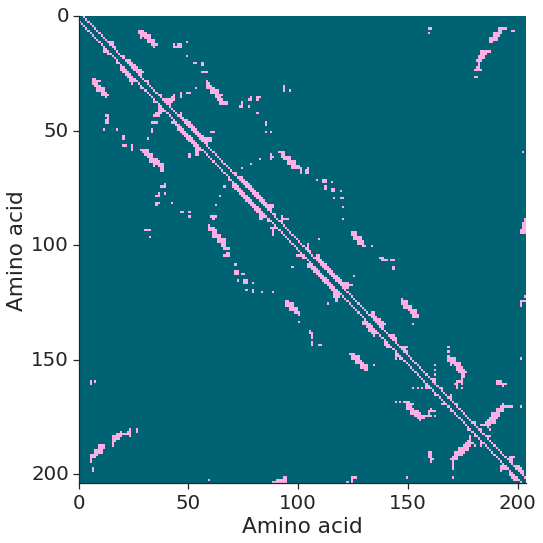

In [8]:
af2_matrix = adjacency.get_pdb_matrix(af2_file)
adjacency_matrix = af2_matrix.copy()
np.fill_diagonal(adjacency_matrix, 0)
np.fill_diagonal(adjacency_matrix[1:], 0)
np.fill_diagonal(adjacency_matrix[:,1:], 0)

plt.figure(figsize=(8, 8))
sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=1.8)
colormap = [_COLOUR_PALETTE["NO_CONTACT"], _COLOUR_PALETTE["CONTACT"]]
heatmap = sns.heatmap(adjacency_matrix, cmap=colormap, cbar=False)
# set_adjacency_matrix_ticks(heatmap)
heatmap.set_xlabel("Amino acid")
heatmap.set_ylabel("Amino acid")
sns.despine()
ticks = np.arange(0, len(adjacency_matrix[0]), 50)
plt.xticks(ticks, ticks, rotation=360)
plt.yticks(ticks, ticks)
plt.tight_layout()

In [24]:
af2_matrix.shape

(204, 204)

In [4]:
template = np.zeros(shape=[204, 204])




In [5]:
shadow_file = pd.read_csv("/home/jguven/Downloads/test/contacts_out", header=None, sep=" ", names=["x1", "r1", "x2", "r2", "d"])
shadow_file.head()
rows = shadow_file["r1"].to_numpy() - 1
columns = shadow_file["r2"].to_numpy() - 1

for i, j in zip(rows, columns):
    template[i, j] = 1
    template[j, i] = 1
    # print(i, j)


In [6]:
template

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

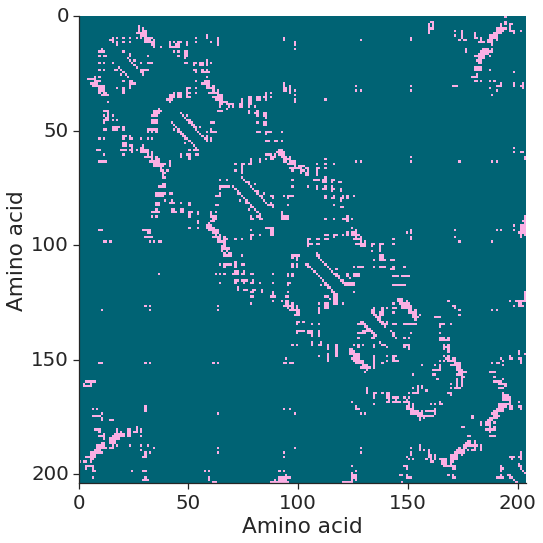

In [12]:
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(template, cmap=colormap, cbar=False)
np.fill_diagonal(adjacency_matrix, 0)
np.fill_diagonal(adjacency_matrix[1:], 0)
np.fill_diagonal(adjacency_matrix[:,1:], 0)
# set_adjacency_matrix_ticks(heatmap)
heatmap.set_xlabel("Amino acid")
heatmap.set_ylabel("Amino acid")
sns.despine()
ticks = np.arange(0, len(template[0]), 50)
plt.xticks(ticks, ticks, rotation=360)
plt.yticks(ticks, ticks)
plt.tight_layout()

In [7]:
test = np.zeros((4, 4))
test

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [12]:
rows = [0, 1, 2, 3]
columns = [1, 2, 0, 3]
for row, col in zip(rows, columns):
    test[row, col] = 1
    test[col, row] = 1

In [13]:
test

array([[0., 1., 1., 0.],
       [1., 0., 1., 0.],
       [1., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [15]:
test[0, 1]


1.0

In [21]:
adj = np.load("../data/alphafold/shadow_adjacency_histogram_not_normed.npy")[0]
print(adj)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


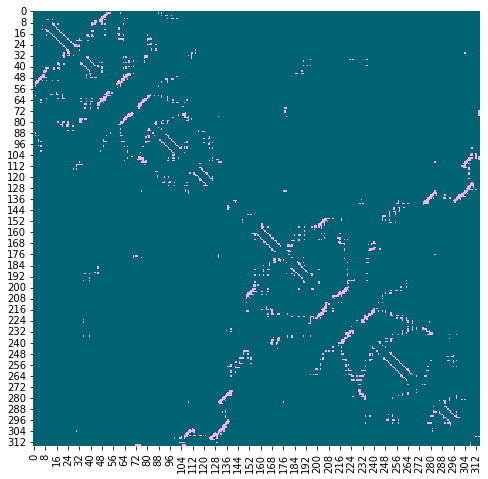

In [22]:
plt.figure(figsize=(8, 8))
colormap = [_COLOUR_PALETTE["NO_CONTACT"], _COLOUR_PALETTE["CONTACT"]]
heatmap = sns.heatmap(adj, cmap=colormap, cbar=False)

In [12]:
dist = np.load("../data/alphafold/shadow_distance_histogram_not_normed.npy")
dist

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

(0.001, 0.1)

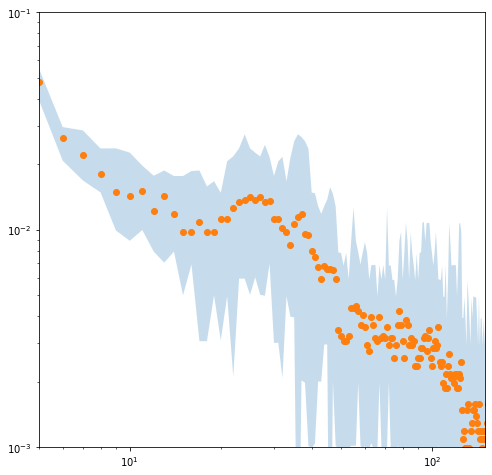

In [9]:
bins = np.linspace(1, 350, 350)[:-1]
mean = np.mean(dist, axis=0)
l_b, u_b = np.quantile(dist, q=[0.003, 0.997], axis=0)
n_mean = mean / np.sum(mean)
n_l_b = l_b / np.sum(mean)
n_u_b = u_b / np.sum(mean)

plt.figure(figsize=(8, 8))
plt.fill_between(bins, n_u_b, n_l_b, alpha=0.25)
plt.scatter(bins, n_mean)
plt.xscale("log")
plt.yscale("log")
plt.xlim(5, 150)
plt.ylim(0.001, 0.1)

In [4]:
hist = np.load("../data/alphafold/histogram_c_6.0_300_not_normed.npy", allow_pickle=True)

In [5]:
hist

array([[628, 330, 224, ...,   0,   0,   0],
       [602, 358, 242, ...,   0,   0,   0],
       [612, 282, 188, ...,   0,   0,   0],
       ...,
       [596, 238, 144, ...,   0,   0,   0],
       [572, 384, 294, ...,   0,   0,   0],
       [578, 334, 242, ...,   0,   0,   0]])

(0.0005, 0.1)

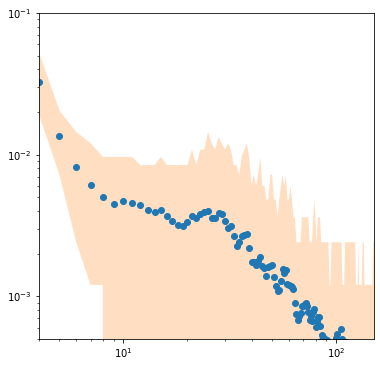

In [14]:
bins = np.linspace(1, 350, 350)[:-1]
lb, ub = np.quantile(hist, q=[0.05, 0.95], axis=0)
mean = np.mean(hist, axis=0)
n_mean = mean / np.sum(mean)
n_lb = lb / np.sum(mean)
n_ub = ub / np.sum(mean)
fig = plt.figure(figsize=(6,6))
plt.scatter(bins, n_mean)
plt.fill_between(bins, n_ub, n_lb, alpha=0.25, zorder=-100)
plt.xscale("log")
plt.yscale("log")
plt.xlim(4, 150)
plt.ylim(0.0005, 0.1)
